In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

lkg = pd.read_csv('CSV/OLD/27AUG18/PIN/PIN.csv')
lkg.set_index('Wavelength');

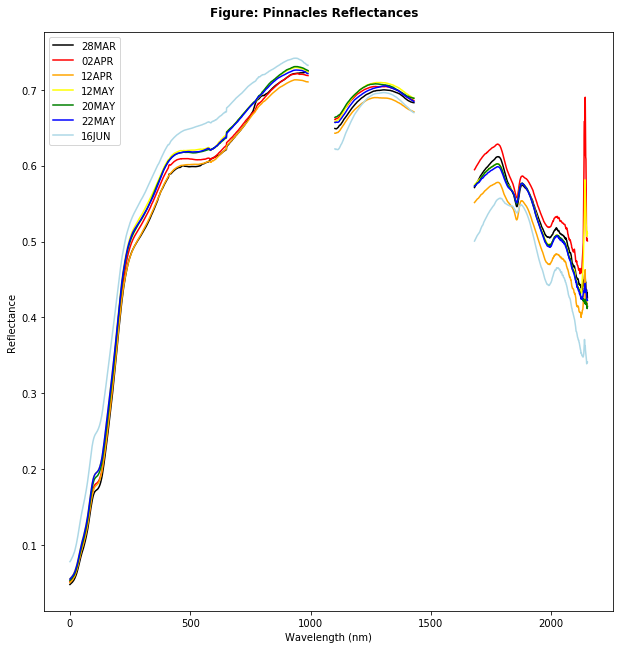

In [2]:
maska = lkg['28MAR'].where(np.logical_or(lkg.index < 1430, lkg.index > 1680))
maskb = maska.where(np.logical_or(maska.index < 990, maska.index > 1100))
masked = maskb.where(np.logical_or(maskb.index<2350, maskb.index>2500))

mask = masked.div(masked)
lkg_masked = lkg.div(mask, axis=0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
fig.suptitle('Figure: Pinnacles Reflectances', fontweight='bold')
axes.set_ylabel('Reflectance')
axes.set_xlabel('Wavelength (nm)')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0)
lkg_masked.plot(y=['28MAR', '02APR', '12APR', '12MAY', '20MAY', '22MAY', '16JUN'], ax=axes, color=['black', 'red', 'orange', 'yellow', 'green', 'blue', 'lightblue'])
plt.savefig('TimesCompare/PIN-Ref.png')

In [3]:
pin_mar = pd.read_csv('CSV/OLD/27AUG18/PIN-28MAR18-Sentinel2b.csv')
pin_apr1 = pd.read_csv('CSV/OLD/27AUG18/PIN-02APR18-Sentinel2a.csv')
pin_apr2 = pd.read_csv('CSV/OLD/27AUG18/PIN-12APR18-Sentinel2a.csv')
pin_may1 = pd.read_csv('CSV/OLD/27AUG18/PIN-12MAY18-Sentinel2a.csv')
pin_may2 = pd.read_csv('CSV/OLD/27AUG18/PIN-20MAY18-Sentinel2b.csv')
pin_may3 = pd.read_csv('CSV/OLD/27AUG18/PIN-22MAY18-Sentinel2a.csv')
pin_jun = pd.read_csv('CSV/OLD/27AUG18/PIN-16JUN18-Sentinel2b.csv')


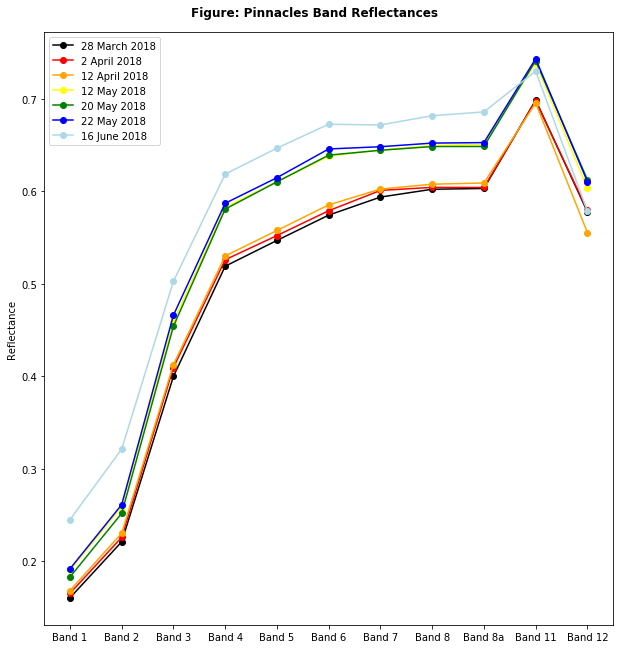

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
fig.suptitle('Figure: Pinnacles Band Reflectances', fontweight='bold')
axes.set_ylabel('Reflectance')
plt.tight_layout(pad=3.5, w_pad=1.0, h_pad=1.0)
axes.set_xticklabels(['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6', 'Band 7', 'Band 8', 'Band 8a', 'Band 11', 'Band 12'])
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
pin_mar.plot(y='Field_mean', style='-o', ax=axes, color='black')
pin_apr1.plot(y='Field_mean', style='-o', ax=axes, color='red')
pin_apr2.plot(y='Field_mean', style='-o', ax=axes, color='orange')
pin_may1.plot(y='Field_mean', style='-o', ax=axes, color='yellow')
pin_may2.plot(y='Field_mean', style='-o', ax=axes, color='green')
pin_may3.plot(y='Field_mean', style='-o', ax=axes, color='blue')
pin_jun.plot(y='Field_mean', style='-o', ax=axes, color='lightblue')
#plt.errorbar(x=lkg_mar.index, y=lkg_mar['Field_mean'], yerr=lkg_mar['Field_SD'], color='red', capsize=3)
#plt.errorbar(x=lkg_apr.index, y=lkg_apr['Field_mean'], yerr=lkg_apr['Field_SD'], color='orange', capsize=3)
#plt.errorbar(x=lkg_may.index, y=lkg_may['Field_mean'], yerr=lkg_may['Field_SD'], color='green', capsize=3)
#plt.errorbar(x=lkg_jul.index, y=lkg_jul['Field_mean'], yerr=lkg_jul['Field_SD'], color='blue', capsize=3)
L=plt.legend()
L.get_texts()[0].set_text('28 March 2018')
L.get_texts()[1].set_text('2 April 2018')
L.get_texts()[2].set_text('12 April 2018')
L.get_texts()[3].set_text('12 May 2018')
L.get_texts()[4].set_text('20 May 2018')
L.get_texts()[5].set_text('22 May 2018')
L.get_texts()[6].set_text('16 June 2018')
plt.savefig('TimesCompare/PIN-BRef.png')